In [1]:
# Import dependencies 
import pandas as pd
import pymongo
import requests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf


# Data pull and pre-processing

In [2]:
# Import Census CSV data 
census_data = pd.read_csv('./Resources/2016_2020_census_data.csv')
census_data

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Year
0,5762,513,39.2,58558,24235.0,50,9.746589,2016
1,5763,2715,43.9,54968,29674.0,488,17.974217,2016
2,5764,3370,41.3,44468,22651.0,323,9.584570,2016
3,5765,1632,46.7,56771,30786.0,85,5.208333,2016
4,5766,598,45.9,52250,33227.0,76,12.709030,2016
...,...,...,...,...,...,...,...,...
66235,16623,552,54.9,51667,26369.0,80,14.492754,2020
66236,16627,2118,44.6,45000,24699.0,324,15.297450,2020
66237,16634,315,46.1,51500,25084.0,24,7.619048,2020
66238,16640,707,48.6,55982,28335.0,167,23.620934,2020


In [3]:
# Perform some data cleansing options Drop NA
census_data.dropna(inplace=True)
census_data

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Year
0,5762,513,39.2,58558,24235.0,50,9.746589,2016
1,5763,2715,43.9,54968,29674.0,488,17.974217,2016
2,5764,3370,41.3,44468,22651.0,323,9.584570,2016
3,5765,1632,46.7,56771,30786.0,85,5.208333,2016
4,5766,598,45.9,52250,33227.0,76,12.709030,2016
...,...,...,...,...,...,...,...,...
66235,16623,552,54.9,51667,26369.0,80,14.492754,2020
66236,16627,2118,44.6,45000,24699.0,324,15.297450,2020
66237,16634,315,46.1,51500,25084.0,24,7.619048,2020
66238,16640,707,48.6,55982,28335.0,167,23.620934,2020


In [4]:
cleaned_census_data = census_data[census_data['Household Income']>0]
cleaned_census_data

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Year
0,5762,513,39.2,58558,24235.0,50,9.746589,2016
1,5763,2715,43.9,54968,29674.0,488,17.974217,2016
2,5764,3370,41.3,44468,22651.0,323,9.584570,2016
3,5765,1632,46.7,56771,30786.0,85,5.208333,2016
4,5766,598,45.9,52250,33227.0,76,12.709030,2016
...,...,...,...,...,...,...,...,...
66235,16623,552,54.9,51667,26369.0,80,14.492754,2020
66236,16627,2118,44.6,45000,24699.0,324,15.297450,2020
66237,16634,315,46.1,51500,25084.0,24,7.619048,2020
66238,16640,707,48.6,55982,28335.0,167,23.620934,2020


In [5]:
# Convert years to time since current 
cleaned_census_data['Years Since'] = cleaned_census_data['Year'].map({2016: 7, 2020: 3})
cleaned_census_data

C:\Users\huntl\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Year,Years Since
0,5762,513,39.2,58558,24235.0,50,9.746589,2016,7
1,5763,2715,43.9,54968,29674.0,488,17.974217,2016,7
2,5764,3370,41.3,44468,22651.0,323,9.584570,2016,7
3,5765,1632,46.7,56771,30786.0,85,5.208333,2016,7
4,5766,598,45.9,52250,33227.0,76,12.709030,2016,7
...,...,...,...,...,...,...,...,...,...
66235,16623,552,54.9,51667,26369.0,80,14.492754,2020,3
66236,16627,2118,44.6,45000,24699.0,324,15.297450,2020,3
66237,16634,315,46.1,51500,25084.0,24,7.619048,2020,3
66238,16640,707,48.6,55982,28335.0,167,23.620934,2020,3


In [6]:
zip_codes = pd.read_csv('./Resources/usazipcode.csv')
zip_codes.columns

Index(['zip', 'Zipcode name', 'City', 'State', 'County Name'], dtype='object')

In [7]:
zip_codes.dropna(inplace=True)
zip_codes['zip'] = zip_codes['zip'].astype(int)
zip_codes.dtypes

zip              int32
Zipcode name    object
City            object
State           object
County Name     object
dtype: object

In [8]:
# Merge the census data and zipcode DF
new_df = pd.merge(cleaned_census_data, zip_codes, how='left', left_on='Zipcode', right_on = 'zip')
new_df.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Year,Years Since,zip,Zipcode name,City,State,County Name
0,5762,513,39.2,58558,24235.0,50,9.746589,2016,7,5762.0,"PITTSFIELD, VT",PITTSFIELD,VT,RUTLAND
1,5763,2715,43.9,54968,29674.0,488,17.974217,2016,7,5763.0,"PITTSFORD, VT",PITTSFORD,VT,RUTLAND
2,5764,3370,41.3,44468,22651.0,323,9.584570,2016,7,5764.0,"POULTNEY, VT",POULTNEY,VT,RUTLAND
3,5765,1632,46.7,56771,30786.0,85,5.208333,2016,7,5765.0,"PROCTOR, VT",PROCTOR,VT,RUTLAND
4,5766,598,45.9,52250,33227.0,76,12.709030,2016,7,5766.0,"RIPTON, VT",RIPTON,VT,ADDISON


In [9]:
# Merge the census and zip data 
census_zip_df = new_df.drop(['zip', 'Zipcode name', 'City', 'County Name'],axis=1)
census_zip_df

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Year,Years Since,State
0,5762,513,39.2,58558,24235.0,50,9.746589,2016,7,VT
1,5763,2715,43.9,54968,29674.0,488,17.974217,2016,7,VT
2,5764,3370,41.3,44468,22651.0,323,9.584570,2016,7,VT
3,5765,1632,46.7,56771,30786.0,85,5.208333,2016,7,VT
4,5766,598,45.9,52250,33227.0,76,12.709030,2016,7,VT
...,...,...,...,...,...,...,...,...,...,...
61665,16623,552,54.9,51667,26369.0,80,14.492754,2020,3,PA
61666,16627,2118,44.6,45000,24699.0,324,15.297450,2020,3,PA
61667,16634,315,46.1,51500,25084.0,24,7.619048,2020,3,PA
61668,16640,707,48.6,55982,28335.0,167,23.620934,2020,3,PA


In [10]:
# Import the winner values by state
election_results = pd.read_csv('./Resources/2016_2020_winners.csv')
election_results

,STATE,Electoral Vote (D),Electoral Vote (R),Popular Vote (D),Popular Vote (R),Popular Vote All Others,Total Vote,Winner,Year
0,AL,NaN,9.0,"849,624","1,441,170","32,488","2,323,282",Republican,2020
1,AK,NaN,3.0,"153,778","189,951","15,801","359,530",Republican,2020
2,AZ,11.0,NaN,"1,672,143","1,661,686","53,497","3,387,326",Democrat,2020
3,AR,NaN,6.0,"423,932","760,647","34,490","1,219,069",Republican,2020
4,CA,55.0,NaN,"11,110,639","6,006,518","384,223","17,501,380",Democrat,2020
...,...,...,...,...,...,...,...,...,...
97,VA,NaN,13.0,"1,769,443","1,981,473","233,715","3,984,631",Republican,2016
98,WA,NaN,8.0,"1,221,747","1,742,718","352,554","3,317,019",Republican,2016
99,WV,5.0,NaN,"489,371","188,794","36,258","714,423",Democrat,2016
100,WI,10.0,NaN,"1,405,284","1,382,536","188,330","2,976,150",Democrat,2016


In [11]:
election_results.columns

Index(['STATE', 'Electoral Vote (D)', 'Electoral Vote (R)', 'Popular Vote (D)',
       'Popular Vote (R)', 'Popular Vote All Others', 'Total Vote', 'Winner',
       'Year'],
      dtype='object')

In [12]:
# Merge the winner info with the previosuly established DF
next_df = pd.merge(census_zip_df, election_results, how='left', left_on=['State','Year'], right_on = ['STATE','Year'])
next_df.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Year,Years Since,State,STATE,Electoral Vote (D),Electoral Vote (R),Popular Vote (D),Popular Vote (R),Popular Vote All Others,Total Vote,Winner
0,5762,513,39.2,58558,24235.0,50,9.746589,2016,7,VT,VT,NaN,3.0,"95,369","178,573","41,125","315,067",Republican
1,5763,2715,43.9,54968,29674.0,488,17.974217,2016,7,VT,VT,NaN,3.0,"95,369","178,573","41,125","315,067",Republican
2,5764,3370,41.3,44468,22651.0,323,9.584570,2016,7,VT,VT,NaN,3.0,"95,369","178,573","41,125","315,067",Republican
3,5765,1632,46.7,56771,30786.0,85,5.208333,2016,7,VT,VT,NaN,3.0,"95,369","178,573","41,125","315,067",Republican
4,5766,598,45.9,52250,33227.0,76,12.709030,2016,7,VT,VT,NaN,3.0,"95,369","178,573","41,125","315,067",Republican


In [13]:
# Create the final dataset for ML application
db_data = next_df.drop(['Year','STATE', 'Electoral Vote (D)', 'Electoral Vote (R)', 'Popular Vote (D)',
       'Popular Vote (R)', 'Popular Vote All Others', 'Total Vote'], axis=1)
db_data

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Years Since,State,Winner
0,5762,513,39.2,58558,24235.0,50,9.746589,7,VT,Republican
1,5763,2715,43.9,54968,29674.0,488,17.974217,7,VT,Republican
2,5764,3370,41.3,44468,22651.0,323,9.584570,7,VT,Republican
3,5765,1632,46.7,56771,30786.0,85,5.208333,7,VT,Republican
4,5766,598,45.9,52250,33227.0,76,12.709030,7,VT,Republican
...,...,...,...,...,...,...,...,...,...,...
61665,16623,552,54.9,51667,26369.0,80,14.492754,3,PA,Democrat
61666,16627,2118,44.6,45000,24699.0,324,15.297450,3,PA,Democrat
61667,16634,315,46.1,51500,25084.0,24,7.619048,3,PA,Democrat
61668,16640,707,48.6,55982,28335.0,167,23.620934,3,PA,Democrat


In [14]:
# last drop of NA values 
db_data.dropna(inplace=True)
db_data

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Years Since,State,Winner
0,5762,513,39.2,58558,24235.0,50,9.746589,7,VT,Republican
1,5763,2715,43.9,54968,29674.0,488,17.974217,7,VT,Republican
2,5764,3370,41.3,44468,22651.0,323,9.584570,7,VT,Republican
3,5765,1632,46.7,56771,30786.0,85,5.208333,7,VT,Republican
4,5766,598,45.9,52250,33227.0,76,12.709030,7,VT,Republican
...,...,...,...,...,...,...,...,...,...,...
61665,16623,552,54.9,51667,26369.0,80,14.492754,3,PA,Democrat
61666,16627,2118,44.6,45000,24699.0,324,15.297450,3,PA,Democrat
61667,16634,315,46.1,51500,25084.0,24,7.619048,3,PA,Democrat
61668,16640,707,48.6,55982,28335.0,167,23.620934,3,PA,Democrat


In [15]:
# Initialize PyMongo to work with MongoDBs
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [16]:
# Export data to MongoDB
electiondb = client.election_db
collection = electiondb.election_data
data_dict = db_data.to_dict("records")
collection.insert_many(data_dict)

In [17]:
#electiondb.election_data.drop()

In [18]:
# creating a DB that has the electoral vote listed
db_electoralVote = next_df.drop(['Year','STATE', 'Popular Vote (D)',
       'Popular Vote (R)', 'Popular Vote All Others', 'Total Vote'], axis=1)


In [19]:
# Replacing NaN with Zeros
db_electoralVote[['Electoral Vote (D)', 'Electoral Vote (R)']] = db_electoralVote[['Electoral Vote (D)', 'Electoral Vote (R)']].fillna(0)
db_electoralVote

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Years Since,State,Electoral Vote (D),Electoral Vote (R),Winner
0,5762,513,39.2,58558,24235.0,50,9.746589,7,VT,0.0,3.0,Republican
1,5763,2715,43.9,54968,29674.0,488,17.974217,7,VT,0.0,3.0,Republican
2,5764,3370,41.3,44468,22651.0,323,9.584570,7,VT,0.0,3.0,Republican
3,5765,1632,46.7,56771,30786.0,85,5.208333,7,VT,0.0,3.0,Republican
4,5766,598,45.9,52250,33227.0,76,12.709030,7,VT,0.0,3.0,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...
61665,16623,552,54.9,51667,26369.0,80,14.492754,3,PA,20.0,0.0,Democrat
61666,16627,2118,44.6,45000,24699.0,324,15.297450,3,PA,20.0,0.0,Democrat
61667,16634,315,46.1,51500,25084.0,24,7.619048,3,PA,20.0,0.0,Democrat
61668,16640,707,48.6,55982,28335.0,167,23.620934,3,PA,20.0,0.0,Democrat


In [20]:
db_electoralVote.dropna(inplace=True)
db_electoralVote

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Years Since,State,Electoral Vote (D),Electoral Vote (R),Winner
0,5762,513,39.2,58558,24235.0,50,9.746589,7,VT,0.0,3.0,Republican
1,5763,2715,43.9,54968,29674.0,488,17.974217,7,VT,0.0,3.0,Republican
2,5764,3370,41.3,44468,22651.0,323,9.584570,7,VT,0.0,3.0,Republican
3,5765,1632,46.7,56771,30786.0,85,5.208333,7,VT,0.0,3.0,Republican
4,5766,598,45.9,52250,33227.0,76,12.709030,7,VT,0.0,3.0,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...
61665,16623,552,54.9,51667,26369.0,80,14.492754,3,PA,20.0,0.0,Democrat
61666,16627,2118,44.6,45000,24699.0,324,15.297450,3,PA,20.0,0.0,Democrat
61667,16634,315,46.1,51500,25084.0,24,7.619048,3,PA,20.0,0.0,Democrat
61668,16640,707,48.6,55982,28335.0,167,23.620934,3,PA,20.0,0.0,Democrat


In [21]:
# Export data with electoral vote to MongoDB
electiondb = client.election_db
collection = electiondb.electoral_data
data_dict = db_electoralVote.to_dict("records")
collection.insert_many(data_dict)

In [22]:
#electiondb.electoral_data.drop()

# Import data from DB for modeling

In [23]:
results = electiondb.election_data.find()
cluster_data = []
for result in results:
    del result['_id']
    cluster_data.append(result)

In [24]:
cluster_data = pd.DataFrame(cluster_data)
cluster_data

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Years Since,State,Winner
0,5762,513,39.2,58558,24235.0,50,9.746589,7,VT,Republican
1,5763,2715,43.9,54968,29674.0,488,17.974217,7,VT,Republican
2,5764,3370,41.3,44468,22651.0,323,9.584570,7,VT,Republican
3,5765,1632,46.7,56771,30786.0,85,5.208333,7,VT,Republican
4,5766,598,45.9,52250,33227.0,76,12.709030,7,VT,Republican
...,...,...,...,...,...,...,...,...,...,...
59806,16623,552,54.9,51667,26369.0,80,14.492754,3,PA,Democrat
59807,16627,2118,44.6,45000,24699.0,324,15.297450,3,PA,Democrat
59808,16634,315,46.1,51500,25084.0,24,7.619048,3,PA,Democrat
59809,16640,707,48.6,55982,28335.0,167,23.620934,3,PA,Democrat


# Building K-Means Cluster Model

In [25]:
# Initial imports
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
import matplotlib.pyplot as plt

In [26]:
cluster_data_cat = cluster_data.dtypes[cluster_data.dtypes == "object"].index.tolist()
cluster_data[cluster_data_cat].nunique()

State     51
Winner     2
dtype: int64

In [27]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(cluster_data[cluster_data_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cluster_data_cat)
encode_df.head()

C:\Users\huntl\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Winner_Democrat,Winner_Republican
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
# Merge one-hot encoded features and drop the originals
cluster_data = cluster_data.merge(encode_df,left_index=True, right_index=True)
cluster_data = cluster_data.drop(cluster_data_cat,1)
cluster_data.head()

C:\Users\huntl\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Years Since,State_AK,State_AL,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Winner_Democrat,Winner_Republican
0,5762,513,39.2,58558,24235.0,50,9.746589,7,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5763,2715,43.9,54968,29674.0,488,17.974217,7,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5764,3370,41.3,44468,22651.0,323,9.584570,7,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5765,1632,46.7,56771,30786.0,85,5.208333,7,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5766,598,45.9,52250,33227.0,76,12.709030,7,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
kcluster_data = cluster_data[cluster_data['Years Since'] == 7]
kcluster_data = kcluster_data.drop('Zipcode', axis=1)

In [30]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(kcluster_data)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,2.751781e+13
1,2,1.582475e+13
2,3,1.191289e+13
3,4,8.778286e+12
4,5,7.135882e+12
5,6,6.289279e+12
6,7,5.536849e+12
7,8,4.979011e+12
8,9,4.543753e+12
9,10,4.202211e+12


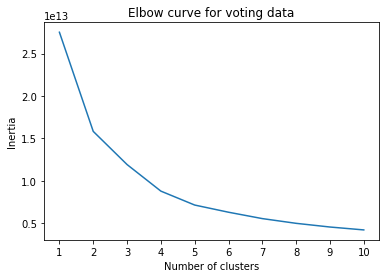

In [31]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for voting data')
plt.show()

In [32]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [33]:
clusters = get_clusters(4, kcluster_data)
clusters

,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Years Since,State_AK,State_AL,State_AR,...,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Winner_Democrat,Winner_Republican,class
0,513,39.2,58558,24235.0,50,9.746589,7,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,2715,43.9,54968,29674.0,488,17.974217,7,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,3370,41.3,44468,22651.0,323,9.584570,7,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3
3,1632,46.7,56771,30786.0,85,5.208333,7,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,598,45.9,52250,33227.0,76,12.709030,7,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30632,17226,35.9,73660,38860.0,1411,8.191106,7,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
30633,9872,36.4,82119,43211.0,478,4.841977,7,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
30634,286,62.3,100755,50354.0,9,3.146853,7,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
30635,122,29.9,75000,24629.0,45,36.885246,7,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [34]:
def show_clusters(df):
    plt.scatter(df['Median Age'], df['Per Capita Income'], c=df['class'])
    plt.xlabel('Median Age')
    plt.ylabel('Per Capita Income')
    plt.show()

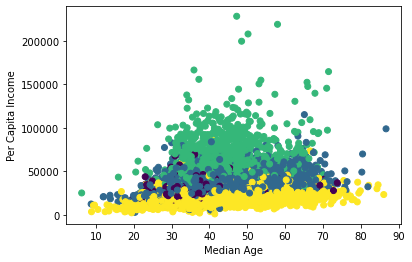

In [35]:
show_clusters(clusters)

# Neural Network Model

In [36]:
nn_model = cluster_data[cluster_data['Years Since'] == 7]
nn_model

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Years Since,State_AK,State_AL,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Winner_Democrat,Winner_Republican
0,5762,513,39.2,58558,24235.0,50,9.746589,7,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5763,2715,43.9,54968,29674.0,488,17.974217,7,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5764,3370,41.3,44468,22651.0,323,9.584570,7,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5765,1632,46.7,56771,30786.0,85,5.208333,7,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5766,598,45.9,52250,33227.0,76,12.709030,7,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30632,99517,17226,35.9,73660,38860.0,1411,8.191106,7,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30633,99518,9872,36.4,82119,43211.0,478,4.841977,7,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30634,99540,286,62.3,100755,50354.0,9,3.146853,7,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30635,99546,122,29.9,75000,24629.0,45,36.885246,7,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
# Split our preprocessed data into our features and target arrays In this case Republican winner is the target
y = nn_model['Winner_Republican'].values
X = nn_model.drop(columns=['Zipcode','Winner_Republican','Winner_Democrat'], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

In [38]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [39]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  2

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="relu", input_dim=number_input_features))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 118       
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [41]:
# Create a callback that saves the model's weights every five epochs
import os 
from tensorflow.keras.callbacks import ModelCheckpoint

os.makedirs('check_points/', exist_ok=True)
path = 'check_points/weights.{epoch:02d}.hdf5'

cp_callback = ModelCheckpoint(filepath = path, save_weights_only = True, save_freq = 5)

In [42]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=15, callbacks= [cp_callback])

Epoch 1/15
719/719 [==============================] - 2s 2ms/step - loss: 0.3967 - accuracy: 0.8297
Epoch 2/15
719/719 [==============================] - 2s 3ms/step - loss: 0.1209 - accuracy: 0.9774
Epoch 3/15
719/719 [==============================] - 3s 4ms/step - loss: 0.0839 - accuracy: 0.9804
Epoch 4/15
719/719 [==============================] - 3s 4ms/step - loss: 0.0724 - accuracy: 0.9804
Epoch 5/15
719/719 [==============================] - 2s 2ms/step - loss: 0.0673 - accuracy: 0.9804
Epoch 6/15
719/719 [==============================] - 2s 2ms/step - loss: 0.0649 - accuracy: 0.9804
Epoch 7/15
719/719 [==============================] - 2s 2ms/step - loss: 0.0639 - accuracy: 0.9804
Epoch 8/15
719/719 [==============================] - 3s 4ms/step - loss: 0.0634 - accuracy: 0.9804
Epoch 9/15
719/719 [==============================] - 4s 5ms/step - loss: 0.0633 - accuracy: 0.9804
Epoch 10/15
719/719 [==============================] - 3s 4ms/step - loss: 0.0632 - accuracy: 0.9804

In [43]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

240/240 - 0s - loss: 0.0659 - accuracy: 0.9790 - 299ms/epoch - 1ms/step
Loss: 0.06591321527957916, Accuracy: 0.9789817333221436


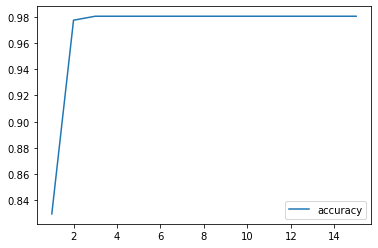

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame(fit_model.history)

df.index+=1 

df.plot(y='accuracy')
plt.show()

# PCA

In [45]:
cluster_data.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Years Since,State_AK,State_AL,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Winner_Democrat,Winner_Republican
0,5762,513,39.2,58558,24235.0,50,9.746589,7,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5763,2715,43.9,54968,29674.0,488,17.974217,7,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5764,3370,41.3,44468,22651.0,323,9.584570,7,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5765,1632,46.7,56771,30786.0,85,5.208333,7,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5766,598,45.9,52250,33227.0,76,12.709030,7,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [46]:
pca_data = cluster_data[cluster_data['Years Since']==7]
pca_data = pca_data.drop(columns=['Zipcode'],axis=1)
pca_scaled = StandardScaler().fit_transform(pca_data)

In [47]:
# Initialize PCA model for 3 principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=.90)

# Get two principal components for the iris data.
vote_pca = pca.fit_transform(pca_scaled)

In [48]:
# Transform PCA data to a DataFrame
df_pca_data = pd.DataFrame(
    data = vote_pca,
)
df_pca_data.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,1.840858,-0.368272,-1.978677,-0.007329,-0.198424,0.247394,-0.555391,0.475077,-0.643900,0.274661,...,1.902521,0.723788,5.916393,5.035140,-0.517739,-6.978170,-0.346102,-0.487522,-0.330202,0.001548
1,1.775125,-0.203163,-2.086299,-0.365528,-0.055471,0.212899,-0.583501,0.563680,-0.577449,0.283099,...,1.899011,0.728684,5.906280,5.036867,-0.516033,-6.977619,-0.349532,-0.493515,-0.339659,0.006283
2,1.616472,-0.188955,-2.202869,-0.218453,-0.248578,0.288614,-0.560833,0.457975,-0.671963,0.275823,...,1.899211,0.719122,5.921011,5.030171,-0.520501,-6.980796,-0.341378,-0.488182,-0.330653,0.002064
3,2.201159,-0.902919,-1.786957,-0.472120,-0.207747,0.293836,-0.591524,0.481800,-0.660905,0.272298,...,1.893829,0.721663,5.923557,5.028992,-0.521029,-6.979496,-0.345573,-0.487301,-0.334396,0.003835
4,1.987274,-0.653530,-2.011645,-0.462612,-0.095560,0.243153,-0.596025,0.544039,-0.606296,0.277165,...,1.895310,0.726845,5.911708,5.034698,-0.518110,-6.979663,-0.347319,-0.492053,-0.342236,0.007991


In [49]:
# Fetch the explained variance
total = pca.explained_variance_ratio_
sum(total)

0.9151877430453306

# 48 components provide 90% of the infomration in this data set

In [50]:
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca_data)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,1.654278e+06
1,2,1.555262e+06
2,3,1.521170e+06
3,4,1.490051e+06
4,5,1.461576e+06
5,6,1.428851e+06
6,7,1.398936e+06
7,8,1.367568e+06
8,9,1.336816e+06


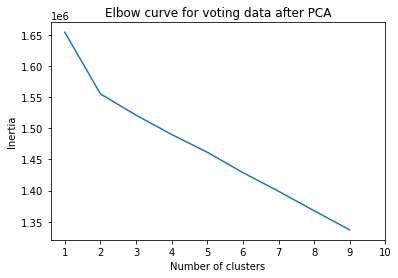

In [51]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for voting data after PCA')
plt.show()

# 

In [52]:
# Get predictions
# predictions = model.predict()
# print(predictions)